<a href="https://colab.research.google.com/github/eduardez/AlfonsoGarcia/blob/master/Copia_de_Machine_Learning_NLP_Vectorization_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataframes library
!pip install pyspellchecker 
!pip install contractions
!pip install nltk --upgrade
!pip install emoji
import nltk
nltk.download("popular")
nltk.download('vader_lexicon') #sentiment analysis
nltk.download('twython') #twitter not necessary

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.5)


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

False

In [2]:
import pandas as pd
import re

from nltk.tokenize.casual import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ngrams, pos_tag
from ast import literal_eval

#Correcciones y emoji
import emoji
from textblob import TextBlob
from spellchecker import SpellChecker
import contractions
from multiprocessing import Pool

#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

#Feature selection 
from sklearn.feature_selection import SelectKBest, chi2

#Classification
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

#Visualization and results
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from tabulate import tabulate

#knn
from sklearn import neighbors
from sklearn.model_selection import KFold
import numpy as np

ModuleNotFoundError: ignored

# Post-processing and Dataset configuration

Dataset options:
 - Dataset Hard:
 - Dataset Soft:

Post-Processing options:
 - N-Grams:
 - POS Tagging
 - RT Count



In [ ]:
#@title Configuration input
choosen_df = 'Hard' #@param ["Hard", "Soft"]
use_ngrams = True #@param {type:"boolean"}
use_POS_taggin = True #@param {type:"boolean"}
use_RT_count = True #@param {type:"boolean"}

url_soft_df = 'https://raw.githubusercontent.com/manuvillalba-uclm/Natural_Lenguaje_Processing-ELM/main/preprocesado_soft.csv?token=AHJ5UMFESTHGL4DK6Q7OIPC74DAU4'
url_hard_df = 'https://raw.githubusercontent.com/manuvillalba-uclm/Natural_Lenguaje_Processing-ELM/main/preprocesado_hard.csv?token=AHJ5UME4YXBZBT27XRCHZDC74DAUY'
url_df = ''
if choosen_df == 'Hard':
  url_df = url_hard_df
else:
  url_df = url_soft_df

ds_alt_twitter = pd.read_csv(url_df, index_col=[0])
# ds_alt_twitter


## N-grams


In [5]:
ngram_url = 'https://raw.githubusercontent.com/manuvillalba-uclm/Natural_Lenguaje_Processing-ELM/main/refined_ngram_dict.csv?token=AHJ5UMBEPPGBHSVIT2JN3FS74W7UI'
df_ngram = pd.read_csv(ngram_url)

df_tweet_array = ds_alt_twitter['tweet'].apply(literal_eval)#reconvertir a listas la columna de tweets


In [6]:
def setWeight(frase):
  fixed_frase = " ".join(frase) #Supongo que la ultima version del preprocesado también estara en vector de palabras
  found_prophate = 0
  for i in range(1,5):
    # Ejecutar la division en n-grams
    split_ngrams = ngrams(fixed_frase.split(), i)
    for gr in split_ngrams:
      posible_prophate = ' '.join(gr) #Convertimos el n-gram en frase
      ngram_search = df_ngram[df_ngram['ngram'] == posible_prophate]
      if len(ngram_search) > 0 : #Si ha encontrado alguna coincidencia, se sustituye el prophate
        aux_prophate = ngram_search['prophate'].item()
        if aux_prophate > found_prophate:
          found_prophate = aux_prophate #Nos quedamos con el mayor prophate
  return found_prophate

In [ ]:
if use_ngrams:
  ds_alt_twitter['prophate'] = df_tweet_array.apply(setWeight)
  print(ds_alt_twitter[ds_alt_twitter.prophate > 0].head(500).to_markdown())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


## POS-Tagging


In [ ]:
df_tweet_array = ds_alt_twitter['tweet'].apply(literal_eval)#reconvertir a listas la columna de tweets

if use_POS_taggin:
  ds_alt_twitter['pos'] = df_tweet_array.apply(nltk.pos_tag)

# Final post-processing


In [ ]:
ds_alt_twitter

,tweet,prophate,pos
0,"['trash', 'man', 'take', 'clean', 'hous', 'alw...",0.0,"[(trash, JJ), (man, NN), (take, VB), (clean, J..."
1,"['boy', 'dat', 'bad', 'place', 'coffin', 'hoe'...",0.0,"[(boy, NN), (dat, NN), (bad, JJ), (place, NN),..."
2,"['dawg', 'confus', 'bitch', 'fuck', 'ever', 'c...",0.0,"[(dawg, NN), (confus, NN), (bitch, NN), (fuck,..."
3,"['tranni', 'like', 'look']",0.0,"[(tranni, NNS), (like, IN), (look, NN)]"
4,"['bitch', 'true', 'hear', 'told', 'faker', 'sh...",0.0,"[(bitch, NN), (true, JJ), (hear, NN), (told, V..."
...,...,...,...
24778,"['scriptur', 'trash', 'tl', 'right', 'lie', 'b...",0.0,"[(scriptur, NN), (trash, NN), (tl, NN), (right..."
24779,"['gone', 'redneck', 'babi', 'crazi', 'wrong', ...",0.0,"[(gone, VBN), (redneck, NN), (babi, NN), (craz..."
24780,"['want', 'di', 'like', 'fuck', 'young', 'dat',...",0.0,"[(want, JJ), (di, NN), (like, IN), (fuck, NN),..."
24781,"['lie', 'bitch', 'tell', 'got', 'wild']",0.0,"[(lie, JJ), (bitch, NN), (tell, NN), (got, VBD..."


#Vectorization

In [ ]:
def identity_tokenizer(text):
    return text

In [ ]:
%%time
# TF-IDF
vectorizer = TfidfVectorizer(lowercase=False, max_features=8000, ngram_range=(1,4))    
vectors = vectorizer.fit_transform(ds_alt_twitter['tweet']) #esto hay que mirarlo

#We have to clean some variables, because we need storage in RAM later
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
vectors = None
denselist = dense.tolist()
dense = None
tweets_vectorization = pd.DataFrame(denselist, columns=feature_names)
denselist =None




In [ ]:
tweets_vectorization

,pos,prophate,tweet
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0


# Feature Selection

In [ ]:
class_label = raw_dataset_tweets.copy()
class_label = class_label['class']


In [ ]:
%%time

n_tweets = tweets_vectorization.shape[0]
n_features = tweets_vectorization.shape[1]
n_features = int(n_features*0.3)

class_label = class_label.iloc[0:n_tweets]
class_label.reset_index(inplace = True, drop = True)
#quitamos el 70% de las features, se supone que en función del target class_label
tweets_vectorization = SelectKBest(chi2, k=n_features).fit_transform(tweets_vectorization,class_label)
tweets_vectorization

df_tweets_vectorization_selected = pd.DataFrame(data=tweets_vectorization)
df_tweets_vectorization_selected['target']= class_label

CPU times: user 1.84 s, sys: 154 ms, total: 1.99 s
Wall time: 1.49 s


# Classification

In [ ]:
tweets_classification = df_tweets_vectorization_selected.copy()

In [ ]:
model = BernoulliNB()

In [ ]:
train, test = train_test_split(tweets_classification, test_size=0.30)
train.reset_index(inplace = True)
test.reset_index(inplace = True)
print(train.shape)
print(test.shape)

(17348, 2402)
(7435, 2402)


In [ ]:
model.fit(train.loc[:, train.columns != 'target'], train['target'])
labels = model.predict(test.loc[:, test.columns != 'target'])

# Evaluation

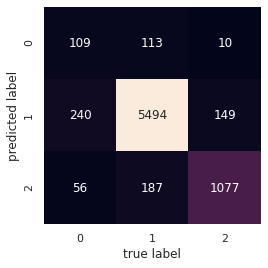

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
mat = confusion_matrix(test['target'], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:

precision, recall, fscore, support = score(test['target'], labels)
print(tabulate({'Name': ['hate speech', 'offensive lenguage', 'neither'], 'Class': [0,1,2],'Precision':precision, 'Recall': recall, 'F-Score': fscore, 'Support': support} , headers=['Name','Class','Precision', 'Recall','F-Score','Support'], tablefmt='orgtbl'))

| Name               |   Class |   Precision |   Recall |   F-Score |   Support |
|--------------------+---------+-------------+----------+-----------+-----------|
| hate speech        |       0 |    0.469828 | 0.269136 |  0.342229 |       405 |
| offensive lenguage |       1 |    0.933877 | 0.948222 |  0.940995 |      5794 |
| neither            |       2 |    0.815909 | 0.871359 |  0.842723 |      1236 |


We know that accuracy is not a correct metric to evaluate these types of problems, but we are just curious

In [ ]:
acc = accuracy_score(test['target'], labels)
print ('Acc', acc)

Acc 0.898453261600538


# Prueba con Knn

In [ ]:
train_knn, test_knn = train_test_split(tweets_classification, test_size=0.30)
train_knn.reset_index(inplace = True)
test_knn.reset_index(inplace = True)
print(train_knn.shape)
print(test_knn.shape)

(17348, 2402)
(7435, 2402)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificat

Max Value uniform : 0.47037808787101293 (17)
Max Value distance : 0.4167602137250441 (21)


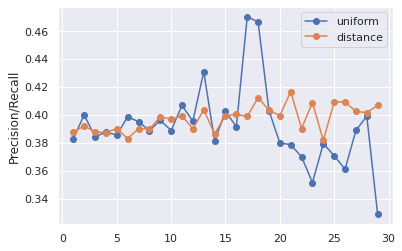

In [ ]:
cv = KFold(n_splits = 2, shuffle = True) # shuffle = False si hay dimensión temporal 

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_score= []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
       for train_fold, test_fold in cv.split(train_knn):
          # División train test aleatoria
          f_train = train_knn.loc[train_fold]
          f_test = train_knn.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['target'], axis=1), 
                               y = f_train['target'])
          y_pred = knn.predict(X = f_test.drop(['target'], axis = 1))
          # evaluación del modelo
          precision, recall, fscore, support = score(f_test['target'], y_pred)
          
          fold_score.append(((sum(precision)/3)+(sum(recall)/3))/2)
       total_scores.append(sum(fold_score)/len(fold_score))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Precision/Recall')      
    

plt.legend()
plt.show() 

In [ ]:
n_neighbors = 13
weights = 'uniform'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights) 
# fit and predict
knn.fit(X = train_knn.loc[:, train_knn.columns != 'target'], y = train_knn['target'])
y_pred = knn.predict(X = test.loc[:, test_knn.columns != 'target'])
precision, recall, fscore, support = score(test_knn['target'], y_pred)
print(tabulate({'Name': ['hate speech', 'offensive lenguage', 'neither'], 'Class': [0,1,2],'Precision':precision, 'Recall': recall, 'F-Score': fscore, 'Support': support} , headers=['Name','Class','Precision', 'Recall','F-Score','Support'], tablefmt='orgtbl'))

| Name               |   Class |   Precision |     Recall |    F-Score |   Support |
|--------------------+---------+-------------+------------+------------+-----------|
| hate speech        |       0 |    0.111111 | 0.00236407 | 0.00462963 |       423 |
| offensive lenguage |       1 |    0.774074 | 0.977217   | 0.863863   |      5750 |
| neither            |       2 |    0.155689 | 0.0206022  | 0.0363891  |      1262 |
